In [1]:
# import necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.

In [2]:
# Read the Dataset

In [3]:
# load the dataset into a Pandas DataFrame
data=pd.read_excel('C:\\Users\\user\\Downloads\\iris(2).xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# To check the first five rows of the dataset
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# To check how many rows and columns are present in the given dataset
data.shape

(150, 5)

In [7]:
# To check some basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2.

In [8]:
# Preprocessing Steps

In [9]:
# Handling Missing Values

In [10]:
# To check the missing values in the given dataset
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

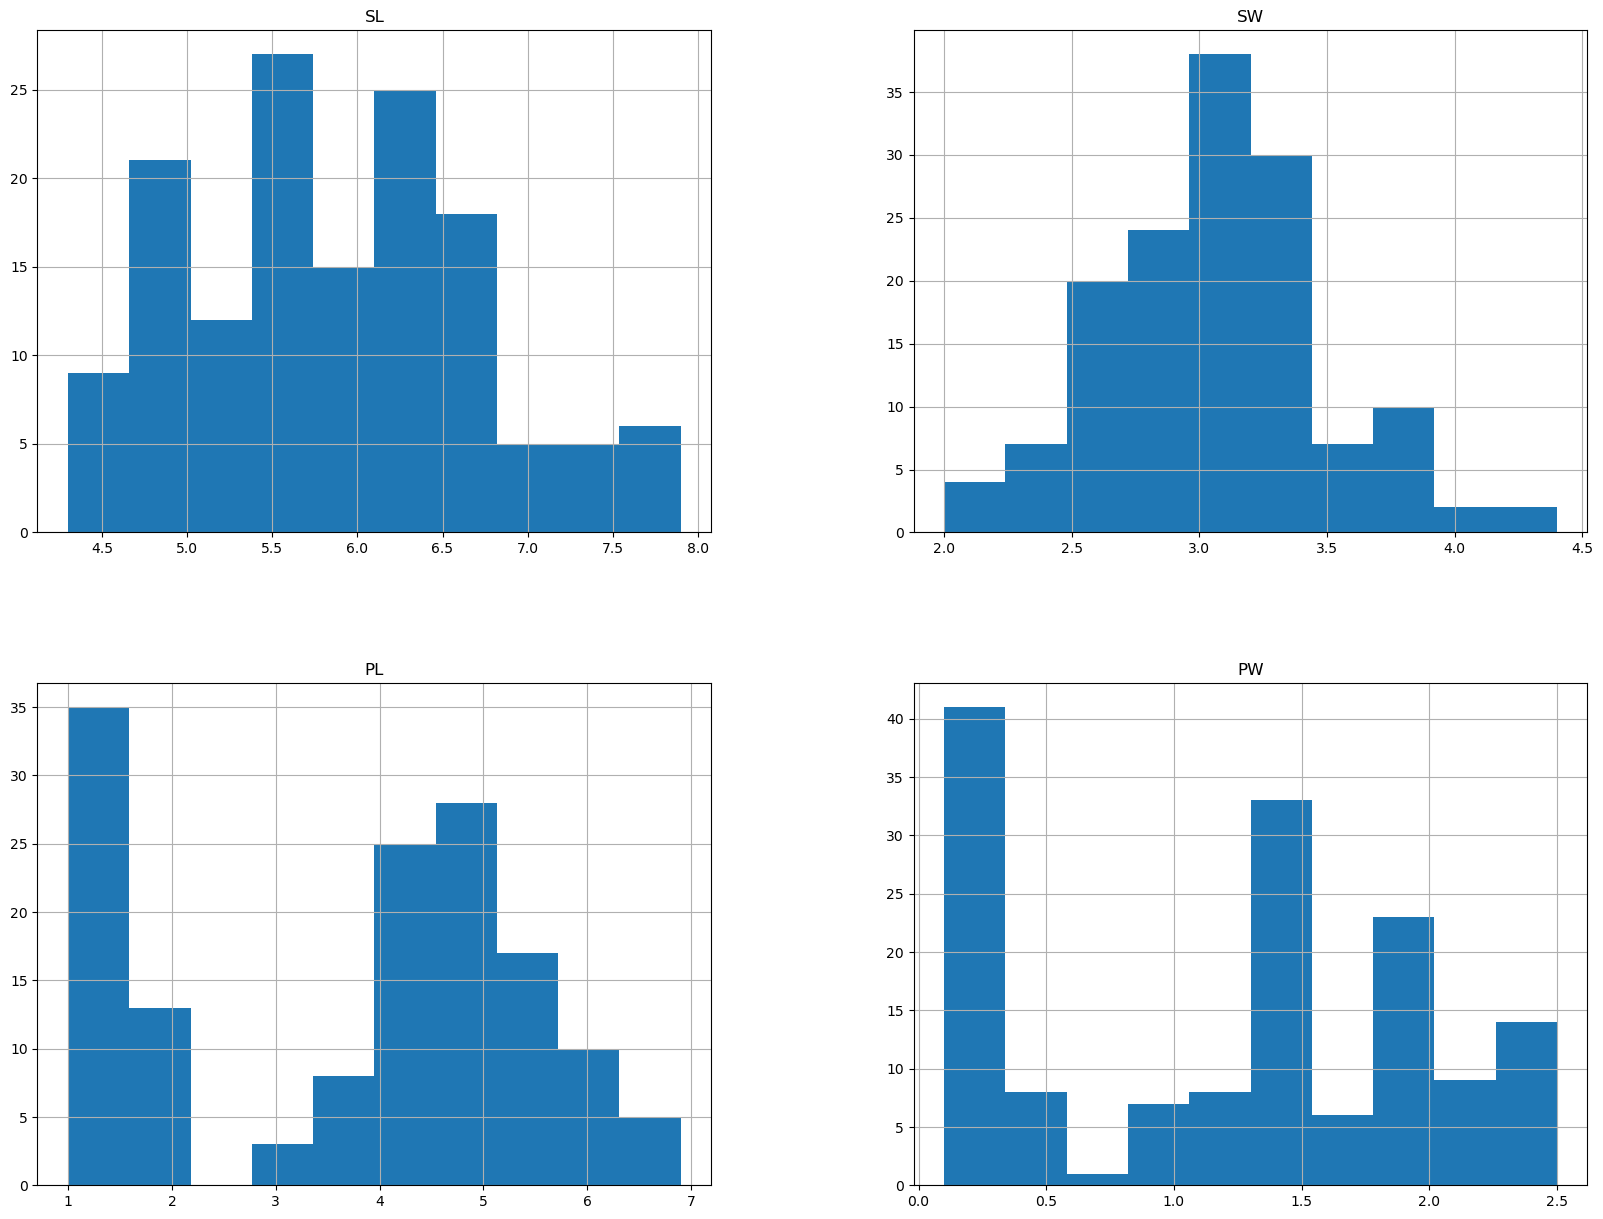

In [11]:
# Plot the frequency graph to show the distribution
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [12]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [13]:
# Replace missing values with the mean
for col in ['SL','SW']:
    data[col]=data[col].fillna(data[col].mean())

In [14]:
# Replace missing values with the median
for col in ['PL']:
    data[col]=data[col].fillna(data[col].median())

In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
# Handling Outliers

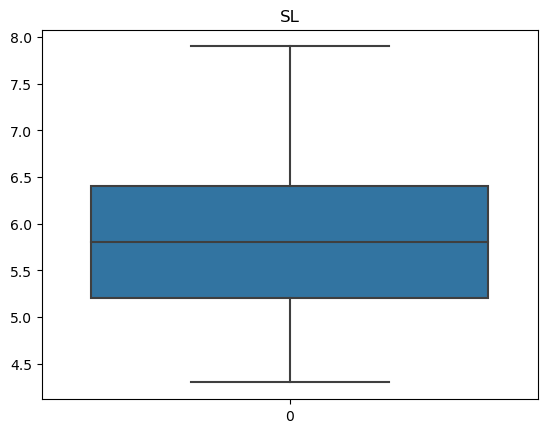

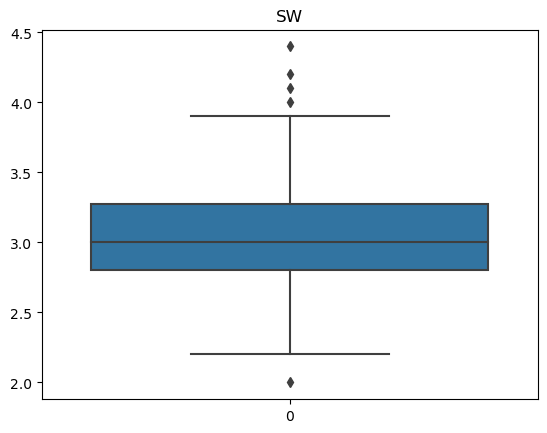

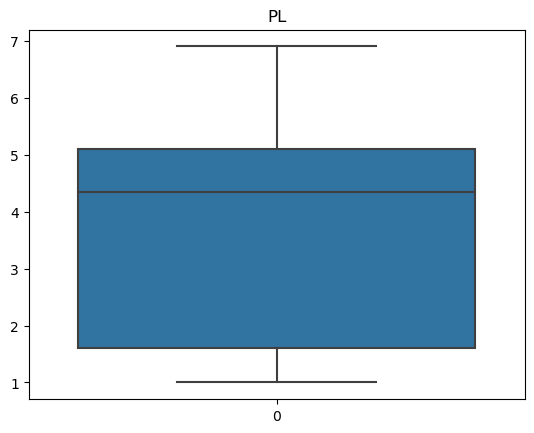

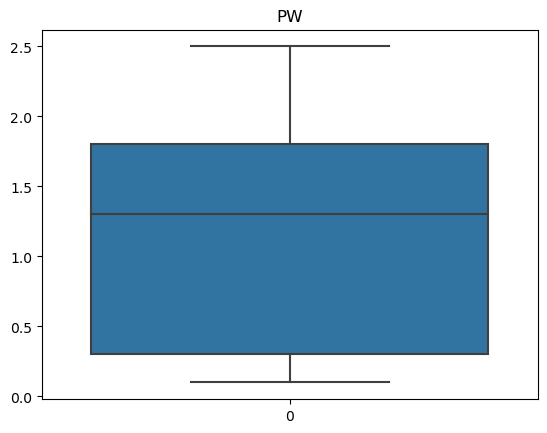

In [17]:
# Plot the Box-plot to identify Outliers
for i in data.columns:
    if data[i].dtype==float:
        plt.figure()
        sns.boxplot(data[i])
        plt.title(i)
        plt.show()

In [18]:
# Calculate the quartiles
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

C:\Users\user\AppData\Local\Temp\ipykernel_5984\1006756904.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_5984\1006756904.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\user\AppData\Local\Temp\ipykernel_5984\1006756904.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoi

In [19]:
# Print the quartiles
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [20]:
data['SW'].median()

3.0

In [21]:
# Calculate the IQR
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [22]:
# Calculate upper & lower whiskers
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
# Print the upper & lower whiskers
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [23]:
# Find the outliers
outliers=[]
for x in data['SW']:
    if (x>up_lim) or (x<low_lim):
       outliers.append(x)

In [24]:
# Print the outliers
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [25]:
# Find the indices of the outliers
ind1=data['SW']>up_lim
data.loc[ind1].index 

Int64Index([14, 15, 32, 33], dtype='int64')

In [26]:
ind2=data['SW']<low_lim
data.loc[ind2].index 

Int64Index([60], dtype='int64')

In [27]:
# Drop the outliers from the dataset
data.drop([14,15, 32, 33,60],inplace=True)

In [28]:
data.shape

(145, 5)

In [29]:
# Encoding Categorical Variables using Label Encoding

In [30]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [32]:
data['Classification'].unique()

array([0, 1, 2])

In [33]:
# Split the dataset into features and labels
X= data.drop('Classification',axis=1) # Features
y= data['Classification'] # Labels

In [34]:
data.describe()

,SL,SW,PL,PW,Classification
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.870287,3.025489,3.847586,1.226897,1.027586
std,0.816690,0.374355,1.712265,0.758219,0.816027
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.855944,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


In [35]:
# Data Scaling using Standard Scaling
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X)

In [36]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 3.

In [37]:
# Classification Models

In [38]:
# Model Training

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [40]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [41]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [42]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_preds = decision_tree.predict(X_test)

In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)

In [44]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
svm_accuracy = accuracy_score(y_test, svm_preds)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)

In [46]:
# Precision
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
svm_precision = precision_score(y_test, svm_preds, average='weighted')
decision_tree_precision = precision_score(y_test, decision_tree_preds, average='weighted')
random_forest_precision = precision_score(y_test, random_forest_preds, average='weighted')

In [47]:
# Recall
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
svm_recall = recall_score(y_test, svm_preds, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_preds, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_preds, average='weighted')

In [48]:
# F1 Score
f1_score_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')
svm_f1_score = f1_score(y_test, svm_preds, average='weighted')
decision_tree_f1_score = f1_score(y_test, decision_tree_preds, average='weighted')
random_forest_f1_score = f1_score(y_test, random_forest_preds, average='weighted')

In [49]:
print("Logistic Regression:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_score_logreg)

Logistic Regression:
Accuracy: 0.9310344827586207
Precision: 0.9310344827586207
Recall: 0.9310344827586207
F1 Score: 0.9310344827586207


In [50]:
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_score_knn)

K-Nearest Neighbors:
Accuracy: 0.896551724137931
Precision: 0.9
Recall: 0.896551724137931
F1 Score: 0.8968109929997409


In [51]:
print("Support Vector Machine:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1_score)

Support Vector Machine:
Accuracy: 0.9310344827586207
Precision: 0.9310344827586207
Recall: 0.9310344827586207
F1 Score: 0.9310344827586207


In [52]:
print("Decision Tree:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1_score)

Decision Tree:
Accuracy: 0.896551724137931
Precision: 0.9
Recall: 0.896551724137931
F1 Score: 0.8968109929997409


In [53]:
print("Random Forest:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1_score)

Random Forest:
Accuracy: 0.9310344827586207
Precision: 0.9310344827586207
Recall: 0.9310344827586207
F1 Score: 0.9310344827586207


In [54]:
print('To determine which model is the best, we can compare the evaluation metrics for each model. Generally, a model with higher accuracy, precision, recall, and F1 score is considered better.Logistic Regression,Support Vector Machine(SVM),Random Forest gives the better model.Conclusively,these models are performing equally well on the Iris dataset.')

To determine which model is the best, we can compare the evaluation metrics for each model. Generally, a model with higher accuracy, precision, recall, and F1 score is considered better.Logistic Regression,Support Vector Machine(SVM),Random Forest gives the better model.Conclusively,these models are performing equally well on the Iris dataset.
